In [1]:
import os
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# get all csv file paths from a given experiment
# select the experiment by choosing a result directory
results_dir = "../results/exp1/1/"

def get_files_by_ext(dir_path, ext):
    csv_filepath_list = list()
    for filename in os.listdir(dir_path):
        if filename.endswith(ext):
            p = os.path.join(dir_path, filename)
            csv_filepath_list.append(p)
    return csv_filepath_list

csv_filepath_list = get_files_by_ext(results_dir, '.csv')
print(csv_filepath_list)

['../results/exp1/1/exp1_2020-01-10 20:50:15_out.csv']


In [3]:
# select a csv output file and load it as pandas dataframe
csv_path = csv_filepath_list[0]
df = pd.read_csv(csv_path)
df

,hardware,ref,chunk_type,chunks_shape,opti,scheduler_opti,buffer_size,split_successful,processing_time,results_filepath
0,hdd,7,blocks,"(770, 605, 700)",True,False,15000000000,True,3092.3072,57394fe7-f9c2-44a1-8e66-55e7096cc34b.html
1,hdd,7,blocks,"(770, 605, 700)",True,False,15000000000,True,3100.6338,24edf32b-3034-4de9-b473-0bb56fcc1200.html
2,hdd,7,blocks,"(770, 605, 700)",False,False,3000000000,True,6736.1834,65e8c93b-aafe-4c46-8e49-e2b309140671.html
3,hdd,7,blocks,"(770, 605, 700)",True,False,3000000000,True,4274.8352,e7fe67ba-229d-4ae9-be56-b97242392d0c.html
4,hdd,7,blocks,"(770, 605, 700)",True,False,9000000000,True,3228.6100,1a9b1c4f-0815-4b97-a95b-a8f598a4d3b0.html
5,hdd,7,blocks,"(770, 605, 700)",False,False,15000000000,True,6785.8588,451eed9f-fab0-4e6a-9e14-87934bbc8b54.html
6,hdd,7,blocks,"(770, 605, 700)",False,False,3000000000,True,6796.2490,b70146d4-4a3a-4e11-aed3-9ad34c4d3cac.html
7,hdd,7,blocks,"(770, 605, 700)",True,False,15000000000,True,3069.2351,b36635f1-b7d9-4843-aba7-8cdd63365345.html
8,hdd,7,blocks,"(770, 605, 700)",False,False,15000000000,True,6671.6529,8aca125f-8963-43b6-8de1-368138109b08.html
9,hdd,7,blocks,"(770, 605, 700)",True,False,3000000000,True,4432.5540,8c56307e-f9dd-47ef-b85d-ee4dc79d7f6f.html


In [4]:
# check if all splits have been successful (at least tests passed)
res = (df["split_successful"] == True)
if not res.all():
    print(f'Warning: some run failed to pass integrity/data check')
else:
    print('All split runs seem to have been successful')

All split runs seem to have been successful


In [5]:
# remove information on output file associated to each run
print(f'nb columns: {len(df.columns)}')
df = df.drop(['split_successful', 'results_filepath', 'scheduler_opti'], axis=1)
print(f'nb columns: {len(df.columns)}')
df

nb columns: 10
nb columns: 7


,hardware,ref,chunk_type,chunks_shape,opti,buffer_size,processing_time
0,hdd,7,blocks,"(770, 605, 700)",True,15000000000,3092.3072
1,hdd,7,blocks,"(770, 605, 700)",True,15000000000,3100.6338
2,hdd,7,blocks,"(770, 605, 700)",False,3000000000,6736.1834
3,hdd,7,blocks,"(770, 605, 700)",True,3000000000,4274.8352
4,hdd,7,blocks,"(770, 605, 700)",True,9000000000,3228.6100
5,hdd,7,blocks,"(770, 605, 700)",False,15000000000,6785.8588
6,hdd,7,blocks,"(770, 605, 700)",False,3000000000,6796.2490
7,hdd,7,blocks,"(770, 605, 700)",True,15000000000,3069.2351
8,hdd,7,blocks,"(770, 605, 700)",False,15000000000,6671.6529
9,hdd,7,blocks,"(770, 605, 700)",True,3000000000,4432.5540


In [6]:
df_opti = df[df["opti"]==True]

In [35]:
# format data for plotting
ONE_GIG = 1000000000
df_opti["buffer_size"] = df_opti["buffer_size"] / ONE_GIG
means = df_opti.groupby('buffer_size')['processing_time'].mean()
stds = df_opti.groupby('buffer_size')['processing_time'].std()
print(means, '\n', stds)

buffer_size
3.0     4322.118167
9.0     3258.401633
15.0    3087.392033
Name: processing_time, dtype: float64 
 buffer_size
3.0     95.968841
9.0     52.023815
15.0    16.266184
Name: processing_time, dtype: float64


/home/user/miniconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# get estimated number of seeks from model
import numpy as np
import sys
sys.path.insert(0, '..')

from dask_io_experiments.custom_setup import setup_all, EXP1_DIR
setup_all()
from dask_io_experiments.seek_model import ClusteredCubicModel

buffer_sizes = [3., 9., 15.]
shape = (3850, 3025, 3500)
chunks_shape = (770, 605, 700)

nb_seeks_list = list()
for buffer_size in buffer_sizes:
    params = [shape, 
              chunks_shape, 
              np.dtype('float16'), 
              buffer_size * ONE_GIG]

    model = ClusteredCubicModel(*params)
    nb_seeks = model.get_nb_seeks()
    nb_seeks_list.append(nb_seeks)
    
seeks_df = pd.DataFrame(nb_seeks_list, columns=["nb_seeks"], index=buffer_sizes)
seeks_df


Seek model details of computation:
self.nb_chunks + self.get_nb_loads() * self.get_nb_seeks_per_load()
- nb chunks: 125.0
- nb loads: 50.0
- nb seeks/load: 592900

Seek model details of computation:
self.nb_chunks + self.get_nb_loads() * self.get_nb_seeks_per_load()
- nb chunks: 125.0
- nb loads: 25.0
- nb seeks/load: 770

Seek model details of computation:
self.nb_chunks + self.get_nb_loads() * self.get_nb_seeks_per_load()
- nb chunks: 125.0
- nb loads: 10.0
- nb seeks/load: 770


,nb_seeks
3.0,17.204808
9.0,9.871739
15.0,8.965079


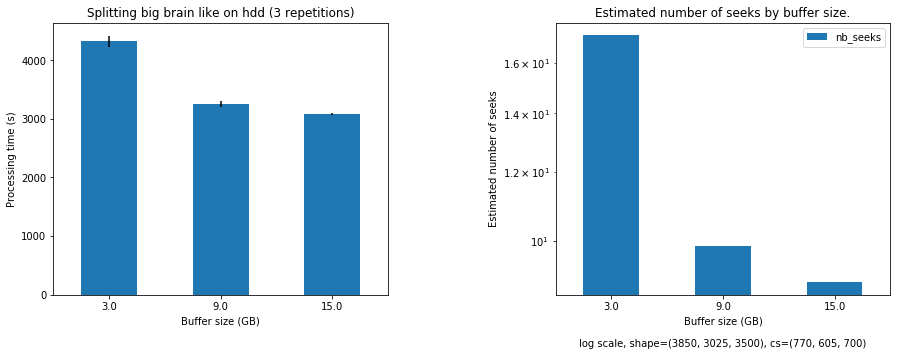

In [145]:
reps = len(df_opti.groupby('buffer_size'))
array_type = "big brain like"
mem_type = "hdd"

# creating a new figure
fig, axes = plt.pyplot.subplots(nrows=1, ncols=2, figsize=(15,5))

curr_axes = axes[0]
title = f"Splitting {array_type} on {mem_type} ({reps} repetitions)"
means.plot(kind='bar', yerr=stds, rot=0, ax=curr_axes)
curr_axes.set_xlabel('Buffer size (GB)')
curr_axes.set_ylabel('Processing time (s)')
curr_axes.title.set_text(title)

curr_axes = axes[1]
title = f"Estimated number of seeks by buffer size."
description = f'log scale, shape={shape}, cs={chunks_shape}'
seeks_df.plot(kind='bar', rot=0, ax=curr_axes, logy=True)
curr_axes.set_xlabel('Buffer size (GB)' + '\n\n' + description)
curr_axes.set_ylabel('Estimated number of seeks')
curr_axes.title.set_text(title)

plt.pyplot.subplots_adjust(wspace=0.5, hspace=0.5)

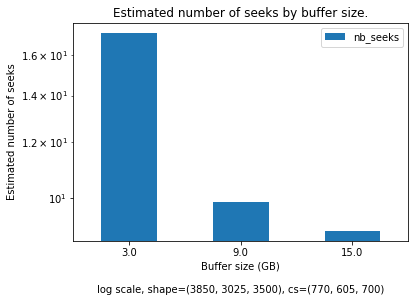

In [144]:
title = f"Estimated number of seeks by buffer size."
description = f'log scale, shape={shape}, cs={chunks_shape}'
axes = seeks_df.plot(kind='bar', rot=0, logy=True)
axes.set_xlabel('Buffer size (GB)' + '\n\n' + description)
axes.set_ylabel('Estimated number of seeks')
axes.title.set_text(title)